**Định nghĩa** : JWT (JSON Web Token) một chuỗi dài và dày đặc không có khoảng trắng được mã hóa từ một đối tượng JSON . Dùng để chia sẻ thông tin bảo mật giữa hai bên — một client và một server.

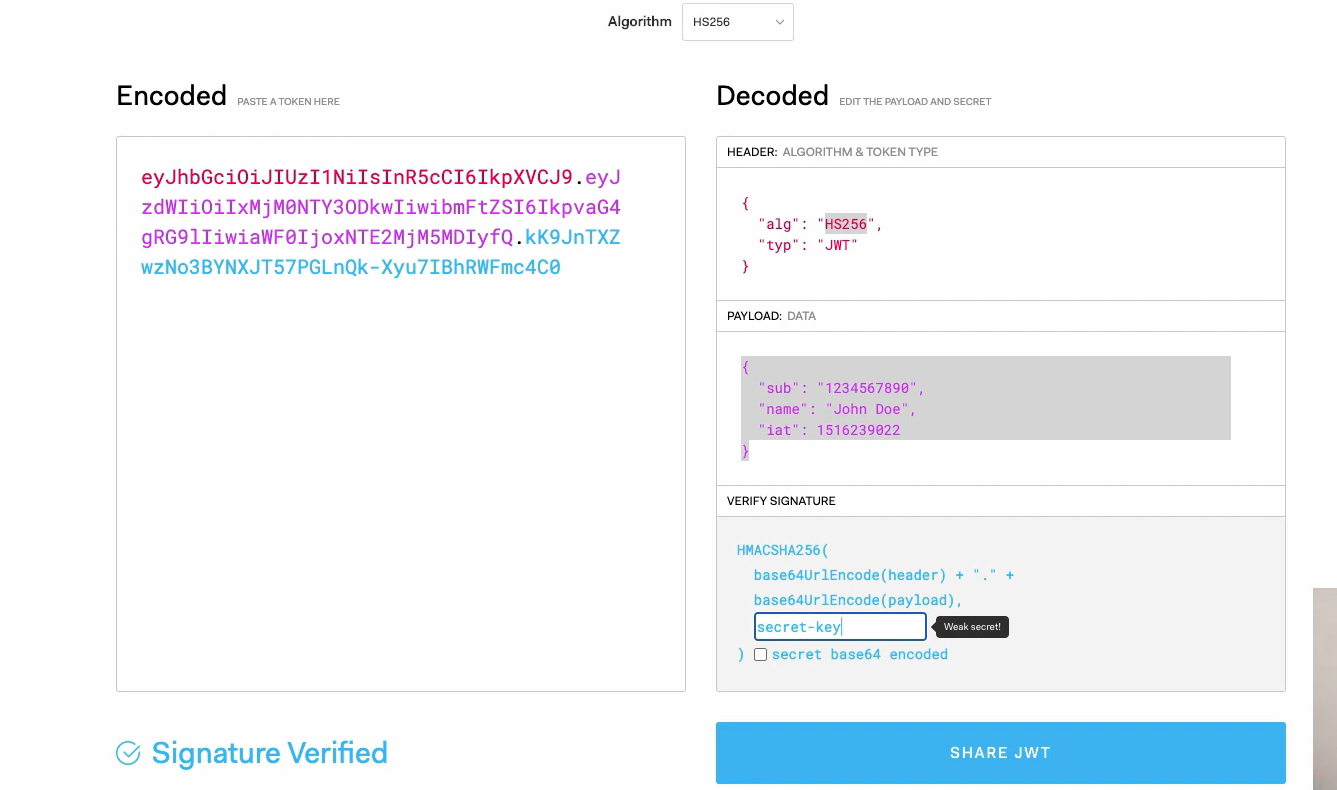

### Cấu trúc JWT

> - JWT bao gồm ba phần chính được phân cách bởi dấu chấm (.):
>> 1. *Header*: Phần này chứa thông tin về cách mã hóa và loại token.
>> 2. *Payload*: chứa thông tin mà bạn muốn mã hóa.
>> 3. *Signature*: Phần này dùng để xác thực token. (phần secret-key trong ảnh : là ký tự bất kỳ do người dùng nhập)
>>>- Signature sẽ là kết hợp của Header + Payload + secret-key. nên nếu thay đổi 1 trong 3 thì token sẽ bị thay đổi. Đây cũng là phần bảo mật nhất.

**1. Header**
> Header thường chứa hai phần:

>>- Thuật toán mã hóa cho phần signature, ví dụ: HMAC SHA256 hoặc RSA.
>> -Loại token, ví dụ: JWT.

> **Chú ý:** RSA hay HMAC SHA256 chỉ là thuật toán dùng cho phần signature, còn phần header sẽ được mã hóa bằng *'base64Url'*.

In [ ]:
{
  "alg": "HS256",
  "typ": "JWT"
}

**2. Payload**
>- Có 3 loại claim:
>> 1. **Registered claims:** là các yêu cầu đã được định nghĩa sẵn VD: sub(chủ đề), exp(thời gian hết hạn), iat(phát hành tại thời điểm)
>> 2. **Public claims:** là các yêu cầu được định nghĩa bởi người dùng. VD: email, name, password.
>> 3. **Private claims:** tạo các yêu cầu tùy chỉnh riêng tư để chia sẻ thông tin cụ thể cho ứng dụng của mình.

>>> *VD1:* Trong khi yêu cầu công khai có thể chứa thông tin chung chung như tên và email, thì yêu cầu riêng tư sẽ cụ thể hơn, chẳng hạn như ID nhân viên và tên phòng ban.

>>> *VD2:* Một ứng dụng cần chia sẻ thông tin về vai trò của người dùng (như "admin" hay "user").

> Phần Payload sẽ được mã hóa bằng *'base64Url'*.

In [ ]:
{
  "sub": "1234567890",
  "name": "John Doe",
  "admin": true
}

**3. Signature**
>- Header đã mã hóa.
>- Payload đã mã hóa.
>- Một bí mật (secret).

>> - Sử dụng thuật toán đã chỉ định trong Header để mã hóa (ví dụ: HMAC SHA256).
>> - Signature giúp đảm bảo rằng token không bị thay đổi trong quá trình truyền tải.

In [ ]:
HMACSHA256(
  base64UrlEncode(header) + "." +
  base64UrlEncode(payload),
  secret
)